In [1]:
import numpy as np
import matplotlib.pyplot as plt

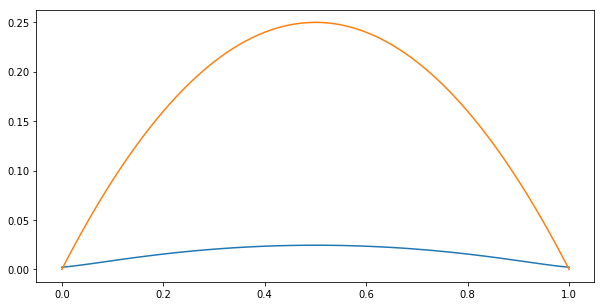

In [2]:
a = 20

def f(t):
    return t * (1 - t)

def g(s):
    return 2 / a * (1 - s) * s + \
        1 / (a ** 2) * (np.exp(-a * s) + np.exp(-a * (1 - s))) + \
        2 / (a ** 3) * (np.exp(-a * s) + np.exp(-a * (1 - s)) - 2)

s_grid = np.linspace(0, 1, num=101)
t_grid = np.linspace(0, 1, num=81)

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), t_grid, f(t_grid))

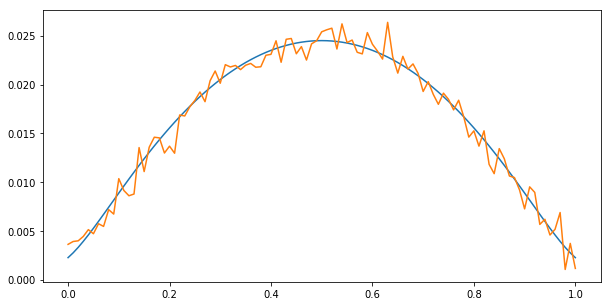

In [3]:
def A_f(i, j):
    return 1 / 80 * np.exp(-20 * np.abs(t_grid[j] - s_grid[i]))

A = np.fromfunction(A_f, (101, 81), dtype=int)

std_dev = 0.05 * np.max(g(s_grid))
noise = np.random.normal(0, std_dev, (101,))
g_noise = g(s_grid) + noise

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), s_grid, g_noise)

(-1.7, 2.3)

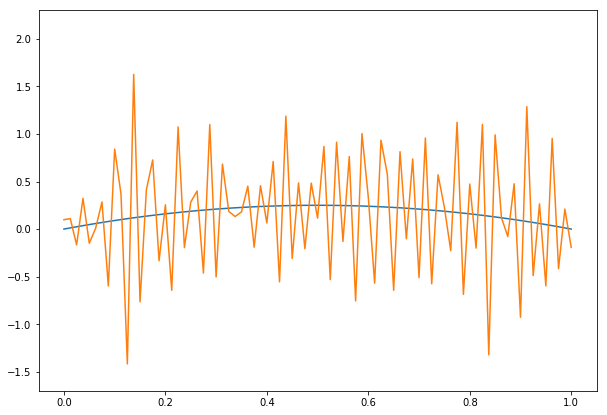

In [4]:
f_minnorm = np.linalg.pinv(A).dot(g_noise)
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), t_grid, f_minnorm)
plt.ylim(-1.7, 2.3)

In [8]:
np.linalg.svd(A, compute_uv=False)

array([ 0.1096363 ,  0.10352371,  0.09465515,  0.08442077,  0.07400886,
        0.06421197,  0.05543868,  0.04781991,  0.04132275,  0.03583548,
        0.03121982,  0.02733863,  0.02406836,  0.02130312,  0.0189546 ,
        0.01695028,  0.01523115,  0.01374943,  0.0124671 ,  0.01135765,
        0.01052298,  0.00946923,  0.00871885,  0.00804703,  0.00744733,
        0.00691079,  0.00642931,  0.00599591,  0.00560461,  0.00525034,
        0.00492871,  0.00463601,  0.00436902,  0.004125  ,  0.00390161,
        0.00369689,  0.00350929,  0.00333779,  0.00318242,  0.00304628,
        0.00294356,  0.00268134,  0.0025895 ,  0.00248917,  0.00239116,
        0.00229804,  0.0022104 ,  0.00212826,  0.00205147,  0.00197982,
        0.00191311,  0.00185115,  0.00179381,  0.00174104,  0.00169285,
        0.00164937,  0.00161085,  0.00157772,  0.00155061,  0.0015303 ,
        0.00151765,  0.00116906,  0.00116339,  0.00115453,  0.00114323,
        0.00113028,  0.0011164 ,  0.00110218,  0.00108808,  0.00

(-1.7, 2.3)

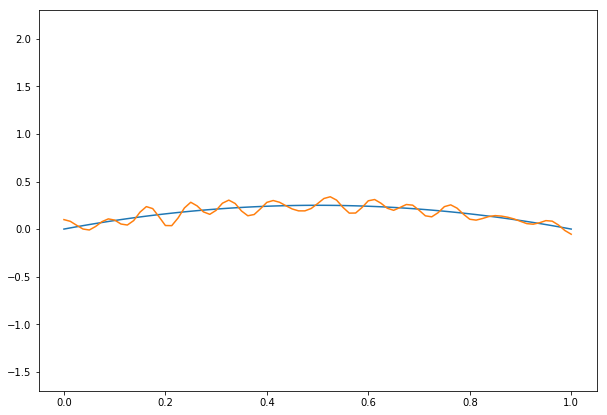

In [12]:
f_minnorm = np.linalg.pinv(A, rcond=0.05).dot(g_noise)
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), t_grid, f_minnorm)
plt.ylim(-1.7, 2.3)

In [ ]:
# Now to Landweber-Friedman iteration...
eps = 9 * np.std(noise)
beta = 0.2 / (np.linalg.norm(A, ord=2)) ** 2
f_n = np.zeros((81,))

def T(f, beta, g_noise):
    return f + beta * (A.T.dot(g_noise) - A.T.dot(A).dot(f))

plt.figure(figsize=(10,15))
plt.ylim(0, 0.5)

i = 0
while(np.linalg.norm(A.dot(f_n) - g_noise) > eps and i < 2000):
    if i % 10 == 0:
        print("{}: {}".format(i, np.linalg.norm(A.dot(f_n) - g_noise)))
        plt.plot(t_grid, f_n, lw=0.5)
    
    f_n = T(f_n, beta, g_noise)
    i += 1

plt.plot(t_grid, f(t_grid), t_grid, f_n, lw=4)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), t_grid, f_n)
plt.ylim(0, 0.5)
print(i)